In [168]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np


# Hyper Parameters 
input_size = 784
num_classes = 10
batch_size = 128
beta = 1e-4
#learning_rate = 0.001

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='.', 
                            train=True, 
                            transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))]))

test_dataset = dsets.MNIST(root='.', 
                           train=False, 
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))]))

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [169]:
# Model
class LogReg(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogReg, self).__init__()
        self._input_dim = input_dim
        self.lin1 = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = x.view(-1, self._input_dim)
        x = self.lin1(x)
        return x


In [170]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [176]:
# SGD

learning_rate = np.array([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6])
num_epochs = 30

# Logistic regression model
model = LogReg(input_size, num_classes)


# Loss and Optimizer
m = nn.LogSoftmax(dim=1)
criterion = nn.NLLLoss()  
training_loss = np.empty([len(learning_rate),num_epochs+1])
validation_loss = np.empty([len(learning_rate),num_epochs+1])

for l in learning_rate:
    print('\n\nLearning rate = %.6f' %l)
    model = LogisticRegression(input_size, num_classes)
    optimizer = torch.optim.SGD(model.parameters(), lr=l, weight_decay=1e-4)
    trloss = 0.0
    # Training the Model
    for epoch in range(num_epochs):
        trloss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            
            # Forward
            outputs = model(images)
            #loss = criterion(m(outputs), labels)
            loss = nn.functional.cross_entropy(outputs, labels)
            
            # Backward + Optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            trloss += loss.item()
            if (epoch==0 and i==0):
                training_loss[np.where(learning_rate==l)[0][0]][0] = loss.item()
                validation_loss[np.where(learning_rate==l)[0][0]][0] = loss.item()
                print('Epoch: [0/%d], Loss: %.4f' %(num_epochs, loss.item()))

        training_loss[np.where(learning_rate==l)[0][0]][epoch+1] = trloss/len(train_loader)
        print ('Epoch: [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, trloss/len(train_loader)))
        
        # Test the Model
        vloss = 0.0
        for images, labels in test_loader:
            images = Variable(images.view(-1, 28*28))
            outputs = model(images)
            loss = criterion(m(outputs), labels)
            vloss += loss.item()
            
        validation_loss[np.where(learning_rate==l)[0][0]][epoch+1] = vloss/len(test_loader)
        print ('    Validation Loss: %.4f' %(vloss/len(test_loader)))
    
    # Test the Model
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))



Learning rate = 0.100000
Epoch: [0/30], Loss: 2.4695
Epoch: [1/30], Loss: 0.3772
    Validation Loss: 0.2903
Epoch: [2/30], Loss: 0.3022
    Validation Loss: 0.2899
Epoch: [3/30], Loss: 0.2918
    Validation Loss: 0.2869
Epoch: [4/30], Loss: 0.2842
    Validation Loss: 0.2772
Epoch: [5/30], Loss: 0.2787
    Validation Loss: 0.2805
Epoch: [6/30], Loss: 0.2761
    Validation Loss: 0.2859
Epoch: [7/30], Loss: 0.2724
    Validation Loss: 0.2841
Epoch: [8/30], Loss: 0.2711
    Validation Loss: 0.2761
Epoch: [9/30], Loss: 0.2684
    Validation Loss: 0.2772
Epoch: [10/30], Loss: 0.2667
    Validation Loss: 0.2787
Epoch: [11/30], Loss: 0.2663
    Validation Loss: 0.2789
Epoch: [12/30], Loss: 0.2649
    Validation Loss: 0.2792
Epoch: [13/30], Loss: 0.2632
    Validation Loss: 0.2897
Epoch: [14/30], Loss: 0.2618
    Validation Loss: 0.2851
Epoch: [15/30], Loss: 0.2607
    Validation Loss: 0.2804
Epoch: [16/30], Loss: 0.2600
    Validation Loss: 0.2802
Epoch: [17/30], Loss: 0.2588
    Validatio

Epoch: [17/30], Loss: 1.6534
    Validation Loss: 1.6128
Epoch: [18/30], Loss: 1.6254
    Validation Loss: 1.5849
Epoch: [19/30], Loss: 1.5984
    Validation Loss: 1.5581
Epoch: [20/30], Loss: 1.5726
    Validation Loss: 1.5324
Epoch: [21/30], Loss: 1.5476
    Validation Loss: 1.5075
Epoch: [22/30], Loss: 1.5235
    Validation Loss: 1.4836
Epoch: [23/30], Loss: 1.5004
    Validation Loss: 1.4606
Epoch: [24/30], Loss: 1.4781
    Validation Loss: 1.4384
Epoch: [25/30], Loss: 1.4565
    Validation Loss: 1.4170
Epoch: [26/30], Loss: 1.4358
    Validation Loss: 1.3964
Epoch: [27/30], Loss: 1.4157
    Validation Loss: 1.3765
Epoch: [28/30], Loss: 1.3963
    Validation Loss: 1.3572
Epoch: [29/30], Loss: 1.3777
    Validation Loss: 1.3387
Epoch: [30/30], Loss: 1.3597
    Validation Loss: 1.3208
Accuracy of the model on the 10000 test images: 70 %


Learning rate = 0.000001
Epoch: [0/30], Loss: 2.5539
Epoch: [1/30], Loss: 2.4913
    Validation Loss: 2.4853
Epoch: [2/30], Loss: 2.4846
    Valida

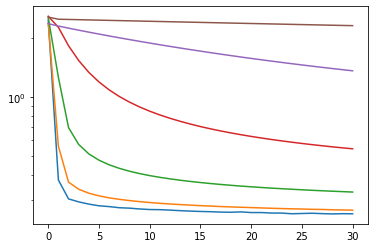

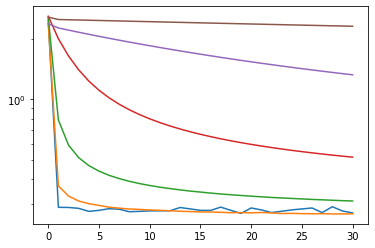

In [177]:
plt.plot(training_loss.transpose())
plt.yscale("log")
plt.show()

plt.plot(validation_loss.transpose())
plt.yscale("log")
plt.show()

In [178]:
## HYPERGRADIENT OPTIMISERS
# From authors
import math
import torch
from torch.optim.optimizer import Optimizer, required
from functools import reduce


class AdamHD(Optimizer):
    """Implements Adam algorithm.
    It has been proposed in `Adam: A Method for Stochastic Optimization`_.
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        hypergrad_lr (float, optional): hypergradient learning rate for the online
        tuning of the learning rate, introduced in the paper
        `Online Learning Rate Adaptation with Hypergradient Descent`_
    .. _Adam\: A Method for Stochastic Optimization:
        https://arxiv.org/abs/1412.6980
    .. _Online Learning Rate Adaptation with Hypergradient Descent:
        https://openreview.net/forum?id=BkrsAzWAb
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=0, hypergrad_lr=1e-8):
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, hypergrad_lr=hypergrad_lr)
        super(AdamHD, self).__init__(params, defaults)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad = grad.add(group['weight_decay'], p.data)

                if state['step'] > 1:
                    prev_bias_correction1 = 1 - beta1 ** (state['step'] - 1)
                    prev_bias_correction2 = 1 - beta2 ** (state['step'] - 1)
                    # Hypergradient for Adam:
                    h = torch.dot(grad.view(-1), torch.div(exp_avg, exp_avg_sq.sqrt().add_(group['eps'])).view(-1)) * math.sqrt(prev_bias_correction2) / prev_bias_correction1
                    # Hypergradient descent of the learning rate:
                    group['lr'] += group['hypergrad_lr'] * h

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1

                p.data.addcdiv_(-step_size, exp_avg, denom)

        return loss
    
class SGDHD(Optimizer):
    r"""Implements stochastic gradient descent (optionally with momentum).
    Nesterov momentum is based on the formula from
    `On the importance of initialization and momentum in deep learning`__.
    Args:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float): learning rate
        momentum (float, optional): momentum factor (default: 0)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        dampening (float, optional): dampening for momentum (default: 0)
        nesterov (bool, optional): enables Nesterov momentum (default: False)
        hypergrad_lr (float, optional): hypergradient learning rate for the online
        tuning of the learning rate, introduced in the paper
        `Online Learning Rate Adaptation with Hypergradient Descent`_
    Example:
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> optimizer.zero_grad()
        >>> loss_fn(model(input), target).backward()
        >>> optimizer.step()
    __ http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf
    .. _Online Learning Rate Adaptation with Hypergradient Descent:
        https://openreview.net/forum?id=BkrsAzWAb
    .. note::
        The implementation of SGD with Momentum/Nesterov subtly differs from
        Sutskever et. al. and implementations in some other frameworks.
        Considering the specific case of Momentum, the update can be written as
        .. math::
                  v = \rho * v + g \\
                  p = p - lr * v
        where p, g, v and :math:`\rho` denote the parameters, gradient,
        velocity, and momentum respectively.
        This is in contrast to Sutskever et. al. and
        other frameworks which employ an update of the form
        .. math::
             v = \rho * v + lr * g \\
             p = p - v
        The Nesterov version is analogously modified.
    """

    def __init__(self, params, lr=required, momentum=0, dampening=0,
                 weight_decay=0, nesterov=False, hypergrad_lr=1e-6):
        defaults = dict(lr=lr, momentum=momentum, dampening=dampening,
                        weight_decay=weight_decay, nesterov=nesterov, hypergrad_lr=hypergrad_lr)
        if nesterov and (momentum <= 0 or dampening != 0):
            raise ValueError("Nesterov momentum requires a momentum and zero dampening")
        super(SGDHD, self).__init__(params, defaults)

        if len(self.param_groups) != 1:
            raise ValueError("SGDHD doesn't support per-parameter options (parameter groups)")

        self._params = self.param_groups[0]['params']
        self._params_numel = reduce(lambda total, p: total + p.numel(), self._params, 0)

    def _gather_flat_grad_with_weight_decay(self, weight_decay=0):
        views = []
        for p in self._params:
            if p.grad is None:
                view = torch.zeros_like(p.data)
            elif p.grad.data.is_sparse:
                view = p.grad.data.to_dense().view(-1)
            else:
                view = p.grad.data.view(-1)
            if weight_decay != 0:
                view.add_(weight_decay, p.data.view(-1))
            views.append(view)
        return torch.cat(views, 0)

    def _add_grad(self, step_size, update):
        offset = 0
        for p in self._params:
            numel = p.numel()
            # view as to avoid deprecated pointwise semantics
            p.data.add_(step_size, update[offset:offset + numel].view_as(p.data))
            offset += numel
        assert offset == self._params_numel

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        assert len(self.param_groups) == 1

        loss = None
        if closure is not None:
            loss = closure()

        group = self.param_groups[0]
        weight_decay = group['weight_decay']
        momentum = group['momentum']
        dampening = group['dampening']
        nesterov = group['nesterov']

        grad = self._gather_flat_grad_with_weight_decay(weight_decay)

        # NOTE: SGDHD has only global state, but we register it as state for
        # the first param, because this helps with casting in load_state_dict
        state = self.state[self._params[0]]
        # State initialization
        if len(state) == 0:
            state['grad_prev'] = torch.zeros_like(grad)

        grad_prev = state['grad_prev']
        # Hypergradient for SGD
        h = torch.dot(grad, grad_prev)
        # Hypergradient descent of the learning rate:
        group['lr'] += group['hypergrad_lr'] * h

        if momentum != 0:
            if 'momentum_buffer' not in state:
                buf = state['momentum_buffer'] = torch.zeros_like(grad)
                buf.mul_(momentum).add_(grad)
            else:
                buf = state['momentum_buffer']
                buf.mul_(momentum).add_(1 - dampening, grad)
            if nesterov:
                grad.add_(momentum, buf)
            else:
                grad = buf

        state['grad_prev'] = grad

        self._add_grad(-group['lr'], grad)

        return loss

In [182]:
# SGD-HD
learning_rate = np.array([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6])
num_epochs = 30

# Logistic regression model
model = LogReg(input_size, num_classes)


# Loss and Optimizer
m = nn.LogSoftmax(dim=1)
criterion = nn.NLLLoss()  
training_lossHD = np.empty([len(learning_rate),num_epochs+1])
validation_lossHD = np.empty([len(learning_rate),num_epochs+1])
learningratesHD = np.empty([len(learning_rate),num_epochs+1])

for l in learning_rate:
    print('\n\nLearning rate = %.6f' %l)
    model = LogisticRegression(input_size, num_classes)
    optimizer = SGDHD(model.parameters(), lr=l, weight_decay=1e-4, hypergrad_lr = 1e-4)
    trloss = 0.0
    
    # Training the Model
    for epoch in range(num_epochs):
        trloss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            
            # Forward
            outputs = model(images)
            loss = nn.functional.cross_entropy(outputs, labels)
            
            # Backward + Optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            trloss += loss.item()
            if (epoch==0 and i==0):
                training_lossHD[np.where(learning_rate==l)[0][0]][0] = loss.item()
                validation_lossHD[np.where(learning_rate==l)[0][0]][0] = loss.item()
                learningratesHD[np.where(learning_rate==l)[0][0]][0] = l
                print('Epoch: [0/%d], Loss: %.4f' %(num_epochs, loss.item()))

        training_lossHD[np.where(learning_rate==l)[0][0]][epoch+1] = trloss/len(train_loader)
        print ('Epoch: [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, trloss/len(train_loader)))
        
        # Test the Model
        vloss = 0.0
        for images, labels in test_loader:
            images = Variable(images.view(-1, 28*28))
            outputs = model(images)
            loss = criterion(m(outputs), labels)
            vloss += loss.item()
            
        validation_lossHD[np.where(learning_rate==l)[0][0]][epoch+1] = vloss/len(test_loader)
        print ('    Validation Loss: %.4f, LR: %.6f' %(vloss/len(test_loader), get_lr(optimizer)))
        
        learningratesHD[np.where(learning_rate==l)[0][0]][epoch+1] = get_lr(optimizer)
    
    # Test the Model
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))



Learning rate = 0.100000
Epoch: [0/30], Loss: 2.5758
Epoch: [1/30], Loss: 0.3729
    Validation Loss: 0.2949, LR: 0.085368
Epoch: [2/30], Loss: 0.2993
    Validation Loss: 0.2820, LR: 0.081063
Epoch: [3/30], Loss: 0.2878
    Validation Loss: 0.2836, LR: 0.076894
Epoch: [4/30], Loss: 0.2805
    Validation Loss: 0.2792, LR: 0.073350
Epoch: [5/30], Loss: 0.2763
    Validation Loss: 0.2767, LR: 0.069558
Epoch: [6/30], Loss: 0.2715
    Validation Loss: 0.2699, LR: 0.066834
Epoch: [7/30], Loss: 0.2680
    Validation Loss: 0.2765, LR: 0.064457
Epoch: [8/30], Loss: 0.2663
    Validation Loss: 0.2759, LR: 0.061842
Epoch: [9/30], Loss: 0.2638
    Validation Loss: 0.2746, LR: 0.059439
Epoch: [10/30], Loss: 0.2615
    Validation Loss: 0.2701, LR: 0.057275
Epoch: [11/30], Loss: 0.2597
    Validation Loss: 0.2681, LR: 0.055133
Epoch: [12/30], Loss: 0.2582
    Validation Loss: 0.2692, LR: 0.053362
Epoch: [13/30], Loss: 0.2572
    Validation Loss: 0.2706, LR: 0.051232
Epoch: [14/30], Loss: 0.2558
  

Epoch: [22/30], Loss: 0.2669
    Validation Loss: 0.2714, LR: 0.007053
Epoch: [23/30], Loss: 0.2664
    Validation Loss: 0.2701, LR: 0.006660
Epoch: [24/30], Loss: 0.2657
    Validation Loss: 0.2704, LR: 0.006512
Epoch: [25/30], Loss: 0.2651
    Validation Loss: 0.2693, LR: 0.005978
Epoch: [26/30], Loss: 0.2647
    Validation Loss: 0.2693, LR: 0.005826
Epoch: [27/30], Loss: 0.2641
    Validation Loss: 0.2695, LR: 0.005291
Epoch: [28/30], Loss: 0.2638
    Validation Loss: 0.2692, LR: 0.004801
Epoch: [29/30], Loss: 0.2634
    Validation Loss: 0.2695, LR: 0.004573
Epoch: [30/30], Loss: 0.2630
    Validation Loss: 0.2691, LR: 0.004400
Accuracy of the model on the 10000 test images: 92 %


Learning rate = 0.000010
Epoch: [0/30], Loss: 2.5366
Epoch: [1/30], Loss: 0.5165
    Validation Loss: 0.3368, LR: 0.018051
Epoch: [2/30], Loss: 0.3382
    Validation Loss: 0.3085, LR: 0.017181
Epoch: [3/30], Loss: 0.3162
    Validation Loss: 0.2964, LR: 0.016131
Epoch: [4/30], Loss: 0.3046
    Validation 

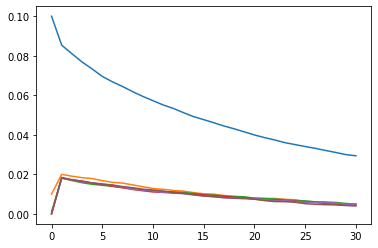

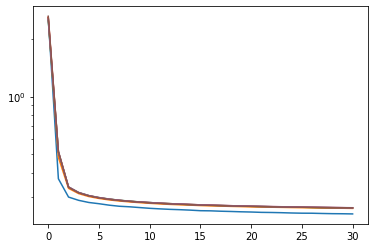

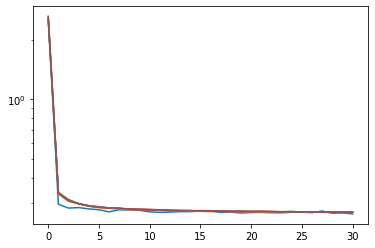

In [183]:
plt.plot(learningratesHD.transpose())
plt.show()

plt.plot(training_lossHD.transpose())
plt.yscale("log")
plt.show()

plt.plot(validation_lossHD.transpose())
plt.yscale("log")
plt.show()



In [217]:
learn = np.resize(learning_rate,(31, 6)).transpose()
np.shape(learningratesHD)
print(learn)
print(learningratesHD)

[[1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01
  1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01
  1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01
  1.e-01]
 [1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02
  1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02
  1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02
  1.e-02]
 [1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03
  1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03
  1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03
  1.e-03]
 [1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04
  1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04
  1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04
  1.e-04]
 [1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05
  1.e-05 1.e-05 1.e-05 1

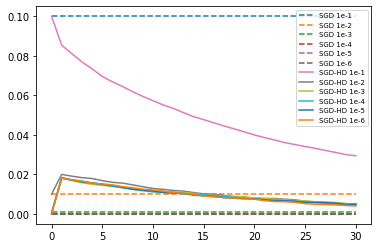

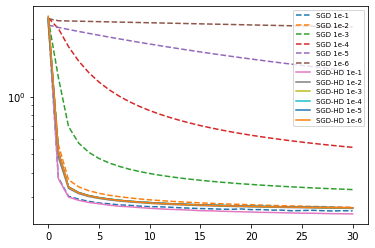

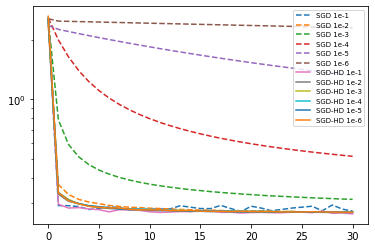

In [343]:
rates = np.append(learn, learningratesHD, axis = 0)
plt.plot(learn[0], linestyle='dashed', label='SGD 1e-1')
plt.plot(learn[1], linestyle='dashed', label='SGD 1e-2')
plt.plot(learn[2], linestyle='dashed', label='SGD 1e-3')
plt.plot(learn[3], linestyle='dashed', label='SGD 1e-4')
plt.plot(learn[4], linestyle='dashed', label='SGD 1e-5')
plt.plot(learn[5], linestyle='dashed', label='SGD 1e-6')
plt.plot(learningratesHD[0], label='SGD-HD 1e-1')
plt.plot(learningratesHD[1], label='SGD-HD 1e-2')
plt.plot(learningratesHD[2], label='SGD-HD 1e-3')
plt.plot(learningratesHD[3], label='SGD-HD 1e-4')
plt.plot(learningratesHD[4], label='SGD-HD 1e-5')
plt.plot(learningratesHD[5], label='SGD-HD 1e-6')
plt.legend(loc=1, prop={'size': 7})
plt.show()

training = np.append(training_loss, training_lossHD, axis = 0)
plt.plot(training_loss[0], linestyle='dashed', label='SGD 1e-1')
plt.plot(training_loss[1], linestyle='dashed', label='SGD 1e-2')
plt.plot(training_loss[2], linestyle='dashed', label='SGD 1e-3')
plt.plot(training_loss[3], linestyle='dashed', label='SGD 1e-4')
plt.plot(training_loss[4], linestyle='dashed', label='SGD 1e-5')
plt.plot(training_loss[5], linestyle='dashed', label='SGD 1e-6')
plt.plot(training_lossHD[0], label='SGD-HD 1e-1')
plt.plot(training_lossHD[1], label='SGD-HD 1e-2')
plt.plot(training_lossHD[2], label='SGD-HD 1e-3')
plt.plot(training_lossHD[3], label='SGD-HD 1e-4')
plt.plot(training_lossHD[4], label='SGD-HD 1e-5')
plt.plot(training_lossHD[5], label='SGD-HD 1e-6')
plt.yscale("log")
plt.legend(loc=1, prop={'size': 7})
plt.show()

validation = np.append(validation_loss, validation_lossHD, axis = 0)
plt.plot(validation_loss[0], linestyle='dashed', label='SGD 1e-1')
plt.plot(validation_loss[1], linestyle='dashed', label='SGD 1e-2')
plt.plot(validation_loss[2], linestyle='dashed', label='SGD 1e-3')
plt.plot(validation_loss[3], linestyle='dashed', label='SGD 1e-4')
plt.plot(validation_loss[4], linestyle='dashed', label='SGD 1e-5')
plt.plot(validation_loss[5], linestyle='dashed', label='SGD 1e-6')
plt.plot(validation_lossHD[0], label='SGD-HD 1e-1')
plt.plot(validation_lossHD[1], label='SGD-HD 1e-2')
plt.plot(validation_lossHD[2], label='SGD-HD 1e-3')
plt.plot(validation_lossHD[3], label='SGD-HD 1e-4')
plt.plot(validation_lossHD[4], label='SGD-HD 1e-5')
plt.plot(validation_lossHD[5], label='SGD-HD 1e-6')
plt.yscale("log")
plt.legend(loc=1, prop={'size': 7})
plt.show()

In [224]:
# ADAM
learning_rate = np.array([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6])
num_epochs = 30

# Logistic regression model
model = LogReg(input_size, num_classes)


# Loss and Optimizer
training_lossADAM = np.empty([len(learning_rate),num_epochs+1])
validation_lossADAM = np.empty([len(learning_rate),num_epochs+1])
learningratesADAM = np.empty([len(learning_rate),num_epochs+1])

for l in learning_rate:
    print('\n\nLearning rate = %.6f' %l)
    model = LogisticRegression(input_size, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=l, weight_decay=1e-4)
    trloss = 0.0
    
    # Training the Model
    for epoch in range(num_epochs):
        trloss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            
            # Forward
            outputs = model(images)
            loss = nn.functional.cross_entropy(outputs, labels)
            
            # Backward + Optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            trloss += loss.item()
            if (epoch==0 and i==0):
                training_lossADAM[np.where(learning_rate==l)[0][0]][0] = loss.item()
                validation_lossADAM[np.where(learning_rate==l)[0][0]][0] = loss.item()
                learningratesADAM[np.where(learning_rate==l)[0][0]][0] = l
                print('Epoch: [0/%d], Loss: %.4f' %(num_epochs, loss.item()))

        training_lossADAM[np.where(learning_rate==l)[0][0]][epoch+1] = trloss/len(train_loader)
        print ('Epoch: [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, trloss/len(train_loader)))
        
        # Test the Model
        vloss = 0.0
        for images, labels in test_loader:
            images = Variable(images.view(-1, 28*28))
            outputs = model(images)
            loss = criterion(m(outputs), labels)
            vloss += loss.item()
            
        validation_lossADAM[np.where(learning_rate==l)[0][0]][epoch+1] = vloss/len(test_loader)
        print ('    Validation Loss: %.4f, LR: %.6f' %(vloss/len(test_loader), optimizer.param_groups[0]['lr']))
        
        learningratesADAM[np.where(learning_rate==l)[0][0]][epoch+1] = get_lr(optimizer)
    
    # Test the Model
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))



Learning rate = 0.100000
Epoch: [0/30], Loss: 2.4826
Epoch: [1/30], Loss: 2.9859
    Validation Loss: 3.0025, LR: 0.100000
Epoch: [2/30], Loss: 2.9903
    Validation Loss: 2.9457, LR: 0.100000
Epoch: [3/30], Loss: 3.0027
    Validation Loss: 3.0877, LR: 0.100000
Epoch: [4/30], Loss: 3.0543
    Validation Loss: 3.4040, LR: 0.100000
Epoch: [5/30], Loss: 3.0164
    Validation Loss: 3.1861, LR: 0.100000
Epoch: [6/30], Loss: 3.0132
    Validation Loss: 2.8463, LR: 0.100000
Epoch: [7/30], Loss: 3.0788
    Validation Loss: 3.1996, LR: 0.100000
Epoch: [8/30], Loss: 3.1879
    Validation Loss: 2.5288, LR: 0.100000
Epoch: [9/30], Loss: 3.1570
    Validation Loss: 2.9614, LR: 0.100000
Epoch: [10/30], Loss: 3.0596
    Validation Loss: 2.5841, LR: 0.100000
Epoch: [11/30], Loss: 2.9760
    Validation Loss: 3.6882, LR: 0.100000
Epoch: [12/30], Loss: 3.1281
    Validation Loss: 3.7327, LR: 0.100000
Epoch: [13/30], Loss: 3.2049
    Validation Loss: 3.3124, LR: 0.100000
Epoch: [14/30], Loss: 3.2252
  

Epoch: [22/30], Loss: 0.2685
    Validation Loss: 0.2676, LR: 0.000100
Epoch: [23/30], Loss: 0.2674
    Validation Loss: 0.2671, LR: 0.000100
Epoch: [24/30], Loss: 0.2662
    Validation Loss: 0.2673, LR: 0.000100
Epoch: [25/30], Loss: 0.2653
    Validation Loss: 0.2669, LR: 0.000100
Epoch: [26/30], Loss: 0.2644
    Validation Loss: 0.2657, LR: 0.000100
Epoch: [27/30], Loss: 0.2635
    Validation Loss: 0.2660, LR: 0.000100
Epoch: [28/30], Loss: 0.2627
    Validation Loss: 0.2648, LR: 0.000100
Epoch: [29/30], Loss: 0.2621
    Validation Loss: 0.2655, LR: 0.000100
Epoch: [30/30], Loss: 0.2613
    Validation Loss: 0.2656, LR: 0.000100
Accuracy of the model on the 10000 test images: 92 %


Learning rate = 0.000010
Epoch: [0/30], Loss: 2.3513
Epoch: [1/30], Loss: 2.0778
    Validation Loss: 1.7987, LR: 0.000010
Epoch: [2/30], Loss: 1.6152
    Validation Loss: 1.4182, LR: 0.000010
Epoch: [3/30], Loss: 1.3059
    Validation Loss: 1.1631, LR: 0.000010
Epoch: [4/30], Loss: 1.0956
    Validation 

In [225]:
# ADAMHD
learning_rate = np.array([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6])
num_epochs = 30

# Logistic regression model
model = LogReg(input_size, num_classes)


# Loss and Optimizer
m = nn.LogSoftmax(dim=1)
criterion = nn.NLLLoss()  
training_lossADAMHD = np.empty([len(learning_rate),num_epochs+1])
validation_lossADAMHD = np.empty([len(learning_rate),num_epochs+1])
learningratesADAMHD = np.empty([len(learning_rate),num_epochs+1])

for l in learning_rate:
    print('\n\nLearning rate = %.6f' %l)
    model = LogisticRegression(input_size, num_classes)
    optimizer = AdamHD(model.parameters(), lr=l, weight_decay=1e-4, hypergrad_lr=1e-6)
    trloss = 0.0
    
    # Training the Model
    for epoch in range(num_epochs):
        trloss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            
            # Forward
            outputs = model(images)
            loss = nn.functional.cross_entropy(outputs, labels)
            
            # Backward + Optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            trloss += loss.item()
            if (epoch==0 and i==0):
                training_lossADAMHD[np.where(learning_rate==l)[0][0]][0] = loss.item()
                validation_lossADAMHD[np.where(learning_rate==l)[0][0]][0] = loss.item()
                learningratesADAMHD[np.where(learning_rate==l)[0][0]][0] = l
                print('Epoch: [0/%d], Loss: %.4f' %(num_epochs, loss.item()))

        training_lossADAMHD[np.where(learning_rate==l)[0][0]][epoch+1] = trloss/len(train_loader)
        print ('Epoch: [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, trloss/len(train_loader)))
        
        # Test the Model
        vloss = 0.0
        for images, labels in test_loader:
            images = Variable(images.view(-1, 28*28))
            outputs = model(images)
            loss = criterion(m(outputs), labels)
            vloss += loss.item()
            
        validation_lossADAMHD[np.where(learning_rate==l)[0][0]][epoch+1] = vloss/len(test_loader)
        print ('    Validation Loss: %.4f, LR: %.6f' %(vloss/len(test_loader), optimizer.param_groups[0]['lr']))
        
        learningratesADAMHD[np.where(learning_rate==l)[0][0]][epoch+1] = get_lr(optimizer)
    
    # Test the Model
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))



Learning rate = 0.100000
Epoch: [0/30], Loss: 2.3184
Epoch: [1/30], Loss: 2.8118
    Validation Loss: 2.7817, LR: 0.099881
Epoch: [2/30], Loss: 2.7565
    Validation Loss: 3.0619, LR: 0.099798
Epoch: [3/30], Loss: 2.9705
    Validation Loss: 3.1955, LR: 0.099712
Epoch: [4/30], Loss: 3.0910
    Validation Loss: 3.3020, LR: 0.099624
Epoch: [5/30], Loss: 3.1206
    Validation Loss: 2.5541, LR: 0.099538
Epoch: [6/30], Loss: 3.0585
    Validation Loss: 3.5593, LR: 0.099451
Epoch: [7/30], Loss: 3.1587
    Validation Loss: 3.1508, LR: 0.099362
Epoch: [8/30], Loss: 3.1460
    Validation Loss: 3.0423, LR: 0.099270
Epoch: [9/30], Loss: 2.9752
    Validation Loss: 3.5590, LR: 0.099183
Epoch: [10/30], Loss: 3.2341
    Validation Loss: 2.8731, LR: 0.099096
Epoch: [11/30], Loss: 3.0663
    Validation Loss: 3.2873, LR: 0.099008
Epoch: [12/30], Loss: 3.3164
    Validation Loss: 2.9151, LR: 0.098918
Epoch: [13/30], Loss: 3.0011
    Validation Loss: 2.7568, LR: 0.098826
Epoch: [14/30], Loss: 3.1043
  

Epoch: [22/30], Loss: 0.2460
    Validation Loss: 0.2676, LR: 0.000489
Epoch: [23/30], Loss: 0.2450
    Validation Loss: 0.2659, LR: 0.000483
Epoch: [24/30], Loss: 0.2442
    Validation Loss: 0.2672, LR: 0.000474
Epoch: [25/30], Loss: 0.2437
    Validation Loss: 0.2661, LR: 0.000463
Epoch: [26/30], Loss: 0.2431
    Validation Loss: 0.2657, LR: 0.000453
Epoch: [27/30], Loss: 0.2432
    Validation Loss: 0.2634, LR: 0.000451
Epoch: [28/30], Loss: 0.2420
    Validation Loss: 0.2647, LR: 0.000443
Epoch: [29/30], Loss: 0.2413
    Validation Loss: 0.2638, LR: 0.000433
Epoch: [30/30], Loss: 0.2409
    Validation Loss: 0.2648, LR: 0.000426
Accuracy of the model on the 10000 test images: 92 %


Learning rate = 0.000010
Epoch: [0/30], Loss: 2.4780
Epoch: [1/30], Loss: 0.6098
    Validation Loss: 0.3250, LR: 0.000639
Epoch: [2/30], Loss: 0.3207
    Validation Loss: 0.2889, LR: 0.000635
Epoch: [3/30], Loss: 0.2946
    Validation Loss: 0.2758, LR: 0.000624
Epoch: [4/30], Loss: 0.2827
    Validation 

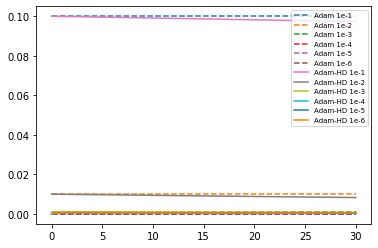

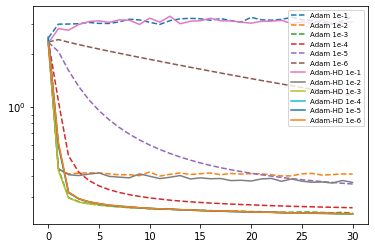

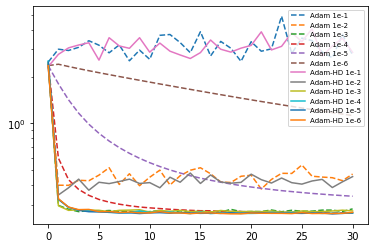

In [334]:
rates = np.append(learningratesADAM, learningratesADAMHD, axis = 0)


plt.plot(learningratesADAM[0], linestyle='dashed', label='Adam 1e-1')
plt.plot(learningratesADAM[1], linestyle='dashed', label='Adam 1e-2')
plt.plot(learningratesADAM[2], linestyle='dashed', label='Adam 1e-3')
plt.plot(learningratesADAM[3], linestyle='dashed', label='Adam 1e-4')
plt.plot(learningratesADAM[4], linestyle='dashed', label='Adam 1e-5')
plt.plot(learningratesADAM[5], linestyle='dashed', label='Adam 1e-6')
plt.plot(learningratesADAMHD[0], label='Adam-HD 1e-1')
plt.plot(learningratesADAMHD[1], label='Adam-HD 1e-2')
plt.plot(learningratesADAMHD[2], label='Adam-HD 1e-3')
plt.plot(learningratesADAMHD[3], label='Adam-HD 1e-4')
plt.plot(learningratesADAMHD[4], label='Adam-HD 1e-5')
plt.plot(learningratesADAMHD[5], label='Adam-HD 1e-6')
plt.legend(loc=1, prop={'size': 7})
plt.show()

training = np.append(training_lossADAM, training_lossADAMHD, axis = 0)
plt.plot(training_lossADAM[0], linestyle='dashed', label='Adam 1e-1')
plt.plot(training_lossADAM[1], linestyle='dashed', label='Adam 1e-2')
plt.plot(training_lossADAM[2], linestyle='dashed', label='Adam 1e-3')
plt.plot(training_lossADAM[3], linestyle='dashed', label='Adam 1e-4')
plt.plot(training_lossADAM[4], linestyle='dashed', label='Adam 1e-5')
plt.plot(training_lossADAM[5], linestyle='dashed', label='Adam 1e-6')
plt.plot(training_lossADAMHD[0], label='Adam-HD 1e-1')
plt.plot(training_lossADAMHD[1], label='Adam-HD 1e-2')
plt.plot(training_lossADAMHD[2], label='Adam-HD 1e-3')
plt.plot(training_lossADAMHD[3], label='Adam-HD 1e-4')
plt.plot(training_lossADAMHD[4], label='Adam-HD 1e-5')
plt.plot(training_lossADAMHD[5], label='Adam-HD 1e-6')
plt.yscale("log")
plt.legend(loc=1, prop={'size': 7})
plt.show()

validation = np.append(validation_lossADAM, validation_lossADAMHD, axis = 0)
plt.plot(validation_lossADAM[0], linestyle='dashed', label='Adam 1e-1')
plt.plot(validation_lossADAM[1], linestyle='dashed', label='Adam 1e-2')
plt.plot(validation_lossADAM[2], linestyle='dashed', label='Adam 1e-3')
plt.plot(validation_lossADAM[3], linestyle='dashed', label='Adam 1e-4')
plt.plot(validation_lossADAM[4], linestyle='dashed', label='Adam 1e-5')
plt.plot(validation_lossADAM[5], linestyle='dashed', label='Adam 1e-6')
plt.plot(validation_lossADAMHD[0], label='Adam-HD 1e-1')
plt.plot(validation_lossADAMHD[1], label='Adam-HD 1e-2')
plt.plot(validation_lossADAMHD[2], label='Adam-HD 1e-3')
plt.plot(validation_lossADAMHD[3], label='Adam-HD 1e-4')
plt.plot(validation_lossADAMHD[4], label='Adam-HD 1e-5')
plt.plot(validation_lossADAMHD[5], label='Adam-HD 1e-6')
plt.yscale("log")
plt.legend(loc=1, prop={'size': 7})
plt.show()

In [254]:
def tune(opt):
    model = LogReg(input_size, num_classes)
    
    if(opt=="SGD"):
        optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=1e-4)
    elif (opt=="SGDHD"):
        optimizer = SGDHD(model.parameters(), lr=0.001, weight_decay=1e-4, hypergrad_lr=0.001)
    elif (opt=="SGDN"):
        optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=1e-4, momentum=0.9, nesterov=True)
    elif (opt=="SGDNHD"):
        optimizer = SGDHD(model.parameters(), lr=0.001, weight_decay=1e-4, momentum=0.9, nesterov=True, hypergrad_lr=0.001)
    elif (opt=="ADAM"):
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    elif (opt =="ADAMHD"):
        optimizer = AdamHD(model.parameters(), lr=0.001, weight_decay=1e-4, hypergrad_lr=1e-7)
    
    num_epochs = 20

    # Loss and Optimizer
    atraining_loss = np.empty([len(learning_rate),num_epochs+1])
    avalidation_loss = np.empty([len(learning_rate),num_epochs+1])
    alearningrates = np.empty([len(learning_rate),num_epochs+1])

    trloss = 0.0

    # Training the Model
    for epoch in range(num_epochs):
        trloss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)

            # Forward
            outputs = model(images)
            loss = nn.functional.cross_entropy(outputs, labels)

            # Backward + Optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            trloss += loss.item()
            if (epoch==0 and i==0):
                atraining_loss[np.where(learning_rate==l)[0][0]][0] = loss.item()
                avalidation_loss[np.where(learning_rate==l)[0][0]][0] = loss.item()
                alearningrates[np.where(learning_rate==l)[0][0]][0] = optimizer.param_groups[0]['lr']
                print('Epoch: [0/%d], Loss: %.4f' %(num_epochs, loss.item()))

        atraining_loss[np.where(learning_rate==l)[0][0]][epoch+1] = trloss/len(train_loader)
        print ('Epoch: [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, trloss/len(train_loader)))

        # Test the Model
        vloss = 0.0
        for images, labels in test_loader:
            images = Variable(images.view(-1, 28*28))
            outputs = model(images)
            loss = criterion(m(outputs), labels)
            vloss += loss.item()

        avalidation_loss[np.where(learning_rate==l)[0][0]][epoch+1] = vloss/len(test_loader)
        print ('    Validation Loss: %.4f, LR: %.6f' %(vloss/len(test_loader), optimizer.param_groups[0]['lr']))

        alearningrates[np.where(learning_rate==l)[0][0]][epoch+1] = get_lr(optimizer)

    # Test the Model
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))
        
    return alearningrates, atraining_loss, avalidation_loss

In [255]:
rSGD = tune("SGD")
rSGDHD = tune("SGDHD")
rSGDN = tune("SGDN")
rSGDNHD = tune("SGDNHD")
rADAM = tune("ADAM")
rADAMHD = tune("ADAMHD")

Epoch: [0/20], Loss: 2.4257
Epoch: [1/20], Loss: 1.2433
    Validation Loss: 0.7737, LR: 0.001000
Epoch: [2/20], Loss: 0.6883
    Validation Loss: 0.5818, LR: 0.001000
Epoch: [3/20], Loss: 0.5667
    Validation Loss: 0.5049, LR: 0.001000
Epoch: [4/20], Loss: 0.5083
    Validation Loss: 0.4622, LR: 0.001000
Epoch: [5/20], Loss: 0.4729
    Validation Loss: 0.4346, LR: 0.001000
Epoch: [6/20], Loss: 0.4486
    Validation Loss: 0.4146, LR: 0.001000
Epoch: [7/20], Loss: 0.4306
    Validation Loss: 0.3996, LR: 0.001000
Epoch: [8/20], Loss: 0.4167
    Validation Loss: 0.3880, LR: 0.001000
Epoch: [9/20], Loss: 0.4055
    Validation Loss: 0.3782, LR: 0.001000
Epoch: [10/20], Loss: 0.3961
    Validation Loss: 0.3704, LR: 0.001000
Epoch: [11/20], Loss: 0.3881
    Validation Loss: 0.3637, LR: 0.001000
Epoch: [12/20], Loss: 0.3813
    Validation Loss: 0.3576, LR: 0.001000
Epoch: [13/20], Loss: 0.3754
    Validation Loss: 0.3525, LR: 0.001000
Epoch: [14/20], Loss: 0.3702
    Validation Loss: 0.3479, 

Epoch: [11/20], Loss: 0.2556
    Validation Loss: 0.2680, LR: 0.001028
Epoch: [12/20], Loss: 0.2552
    Validation Loss: 0.2691, LR: 0.001014
Epoch: [13/20], Loss: 0.2536
    Validation Loss: 0.2697, LR: 0.001002
Epoch: [14/20], Loss: 0.2521
    Validation Loss: 0.2731, LR: 0.000990
Epoch: [15/20], Loss: 0.2517
    Validation Loss: 0.2732, LR: 0.000981
Epoch: [16/20], Loss: 0.2506
    Validation Loss: 0.2713, LR: 0.000969
Epoch: [17/20], Loss: 0.2497
    Validation Loss: 0.2806, LR: 0.000955
Epoch: [18/20], Loss: 0.2476
    Validation Loss: 0.2684, LR: 0.000940
Epoch: [19/20], Loss: 0.2474
    Validation Loss: 0.2736, LR: 0.000923
Epoch: [20/20], Loss: 0.2477
    Validation Loss: 0.2735, LR: 0.000917
Accuracy of the model on the 10000 test images: 92 %


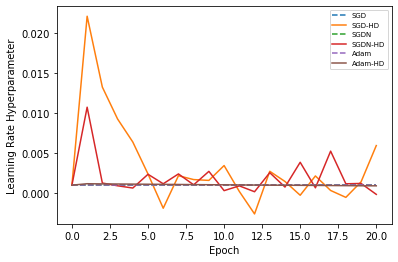

In [345]:
plt.plot(rSGD[0][0], linestyle='dashed', label='SGD')
plt.plot(rSGDHD[0][0], label='SGD-HD')
plt.plot(rSGDN[0][0], linestyle='dashed', label='SGDN')
plt.plot(rSGDNHD[0][0], label='SGDN-HD')
plt.plot(rADAM[0][0], linestyle='dashed', label='Adam')
plt.plot(rADAMHD[0][0], label='Adam-HD')
plt.legend(loc=1, prop={'size': 7})
plt.ylabel('Learning Rate Hyperparameter')
plt.xlabel('Epoch')
plt.show()

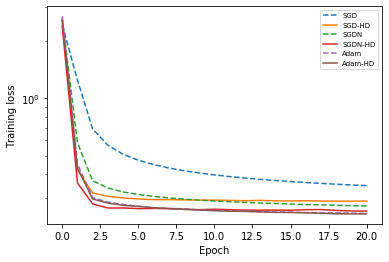

In [346]:
plt.plot(rSGD[1][0], linestyle='dashed', label='SGD')
plt.plot(rSGDHD[1][0], label='SGD-HD')
plt.plot(rSGDN[1][0], linestyle='dashed', label='SGDN')
plt.plot(rSGDNHD[1][0], label='SGDN-HD')
plt.plot(rADAM[1][0], linestyle='dashed', label='Adam')
plt.plot(rADAMHD[1][0], label='Adam-HD')
plt.yscale("log")
plt.legend(loc=1, prop={'size': 7})
plt.ylabel('Training loss')
plt.xlabel('Epoch')
plt.show()

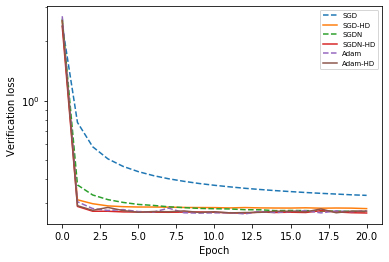

In [347]:
plt.plot(rSGD[2][0], linestyle='dashed', label='SGD')
plt.plot(rSGDHD[2][0], label='SGD-HD')
plt.plot(rSGDN[2][0], linestyle='dashed', label='SGDN')
plt.plot(rSGDNHD[2][0], label='SGDN-HD')
plt.plot(rADAM[2][0], linestyle='dashed', label='Adam')
plt.plot(rADAMHD[2][0], label='Adam-HD')
plt.yscale("log")
plt.legend(loc=1, prop={'size': 7})
plt.ylabel('Verification loss')
plt.xlabel('Epoch')
plt.show()

In [296]:
def grid(opt, a0, b):
    model = LogReg(input_size, num_classes)
    
    if(opt=="SGD"):
        optimizer = torch.optim.SGD(model.parameters(), lr=a0, weight_decay=1e-4)
    elif (opt=="SGDHD"):
        optimizer = SGDHD(model.parameters(), lr=a0, weight_decay=1e-4, hypergrad_lr=b)
    elif (opt=="SGDN"):
        optimizer = torch.optim.SGD(model.parameters(), lr=a0, weight_decay=1e-4, momentum=0.9, nesterov=True)
    elif (opt=="SGDNHD"):
        optimizer = SGDHD(model.parameters(), lr=a0, weight_decay=1e-4, momentum=0.9, nesterov=True, hypergrad_lr=b)
    elif (opt=="ADAM"):
        optimizer = torch.optim.Adam(model.parameters(), lr=a0, weight_decay=1e-4)
    elif (opt =="ADAMHD"):
        optimizer = AdamHD(model.parameters(), lr=a0, weight_decay=1e-4, hypergrad_lr=b)
    
    iterations = 0
    trloss = 0.0
    trainloss = 0.0
    # Training the Model
    while (iterations<=25000):
        trloss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)

            # Forward
            outputs = model(images)
            loss = nn.functional.cross_entropy(outputs, labels)
            if (loss.item()<0.29):
                print(iterations)
                return iterations
            # Backward + Optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            trloss += loss.item()
            iterations = iterations + 1
        trainloss = trloss/len(train_loader)
        print ('iterations: %d, Loss: %.4f' % (iterations, trloss/len(train_loader)))

In [307]:
alearn = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
bhyper = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

gsgd = np.empty(6)
gsgdn = np.empty(6)
gadam = np.empty(6)
gsgdhd = np.empty([6,6])
gsgdnhd = np.empty([6,6])
gadamhd = np.empty([6,6])

for i, (a) in enumerate(alearn):
    gsgd[i] = grid("SGD", a, 0)
    gsgdn[i] = grid("SGDN", a, 0)
    #gadam[i] = grid("ADAM", a, 0)
    for j, (b) in enumerate(bhyper):
        gsgdhd[i][j] = grid("SGDHD", a, b)
        gsgdnhd[i][j] = grid("SGDNHD", a, b)
        #gadamhd[i][j] = grid("ADAMHD", a, b)

76
35
370
iterations: 469, Loss: 19.7125
iterations: 938, Loss: 4.8789
1130
159
iterations: 469, Loss: 16.6174
926
56
16
69
62
100
30
91
30
299
29
iterations: 469, Loss: 5.1822
919
iterations: 469, Loss: 30.2223
iterations: 938, Loss: 5.1934
iterations: 1407, Loss: 3.7942
1603
164
386
125
33
245
44
378
25
334
28
iterations: 469, Loss: 1.2502
iterations: 938, Loss: 0.6826
iterations: 1407, Loss: 0.5609
iterations: 1876, Loss: 0.5036
iterations: 2345, Loss: 0.4689
2407
304
468
iterations: 469, Loss: 41.8690
iterations: 938, Loss: 5.5300
iterations: 1407, Loss: 3.6841
1641
131
40
115
48
171
52
iterations: 469, Loss: 0.7447
538
60
iterations: 469, Loss: 1.0463
iterations: 938, Loss: 0.5429
1112
206
iterations: 469, Loss: 2.1885
iterations: 938, Loss: 1.7795
iterations: 1407, Loss: 1.5091
iterations: 1876, Loss: 1.3193
iterations: 2345, Loss: 1.1813
iterations: 2814, Loss: 1.0774
iterations: 3283, Loss: 0.9967
iterations: 3752, Loss: 0.9325
iterations: 4221, Loss: 0.8801
iterations: 4690, L

iterations: 3752, Loss: 2.1266
iterations: 4221, Loss: 2.0798
iterations: 4690, Loss: 2.0352
iterations: 5159, Loss: 1.9924
iterations: 5628, Loss: 1.9516
iterations: 6097, Loss: 1.9125
iterations: 6566, Loss: 1.8748
iterations: 7035, Loss: 1.8388
iterations: 7504, Loss: 1.8042
iterations: 7973, Loss: 1.7708
iterations: 8442, Loss: 1.7388
iterations: 8911, Loss: 1.7080
iterations: 9380, Loss: 1.6783
iterations: 9849, Loss: 1.6498
iterations: 10318, Loss: 1.6223
iterations: 10787, Loss: 1.5958
iterations: 11256, Loss: 1.5702
iterations: 11725, Loss: 1.5456
iterations: 12194, Loss: 1.5218
iterations: 12663, Loss: 1.4988
iterations: 13132, Loss: 1.4767
iterations: 13601, Loss: 1.4553
iterations: 14070, Loss: 1.4347
iterations: 14539, Loss: 1.4146
iterations: 15008, Loss: 1.3954
iterations: 15477, Loss: 1.3767
iterations: 15946, Loss: 1.3587
iterations: 16415, Loss: 1.3412
iterations: 16884, Loss: 1.3244
iterations: 17353, Loss: 1.3080
iterations: 17822, Loss: 1.2922
iterations: 18291, Los

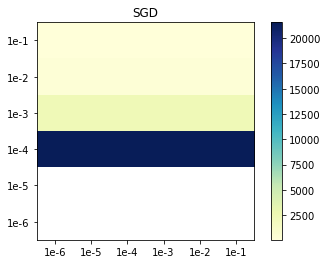

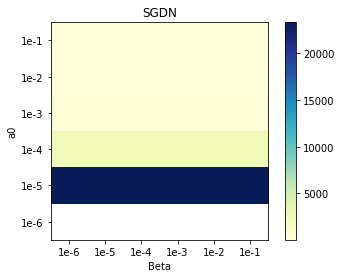

In [365]:
fig, ax = plt.subplots(1,1)
img = ax.imshow(np.resize(gsgd,(6,6)).transpose(), cmap='YlGnBu', interpolation='nearest')
x_label_list = ['1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1']
y_label_list = ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6']
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(x_label_list)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(y_label_list)
fig.colorbar(img)
plt.title('SGD')
plt.xlabel('Beta')
plt.ylabel('a0')
plt.show()

fig, ax = plt.subplots(1,1)
img = ax.imshow(np.resize(gsgdn,(6,6)).transpose(), cmap='YlGnBu', interpolation='nearest')
x_label_list = ['1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1']
y_label_list = ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6']
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(x_label_list)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(y_label_list)
fig.colorbar(img)
plt.title('SGDN')
plt.xlabel('Beta')
plt.ylabel('a0')
plt.show()

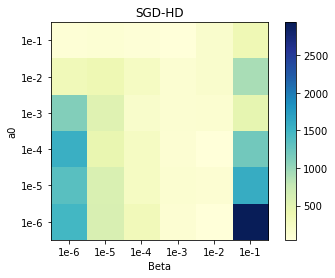

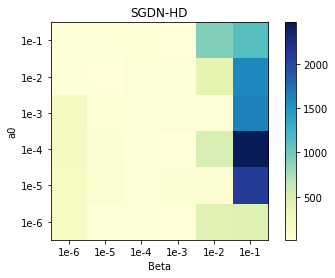

In [366]:
#print(gsgdhd)
fig, ax = plt.subplots(1,1)
img = ax.imshow(np.fliplr(gsgdhd), cmap='YlGnBu', interpolation='nearest')
x_label_list = ['1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1']
y_label_list = ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6']
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(x_label_list)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(y_label_list)
fig.colorbar(img)
plt.title('SGD-HD')
plt.xlabel('Beta')
plt.ylabel('a0')
plt.show()

fig, ax = plt.subplots(1,1)
img = ax.imshow(np.fliplr(gsgdnhd), cmap='YlGnBu', interpolation='nearest')
x_label_list = ['1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1']
y_label_list = ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6']
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(x_label_list)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(y_label_list)
fig.colorbar(img)
plt.title('SGDN-HD')
plt.xlabel('Beta')
plt.ylabel('a0')
plt.show()